In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [76]:
mrt_df = pd.read_csv('Data\Master Sets\TrainStationMaster.csv')

In [77]:
mrt_df.head()

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
0,0,2024-03,WEEKDAY,11,TRAIN,NS7,21943,15130
1,1,2024-03,WEEKENDS/HOLIDAY,11,TRAIN,NS7,13062,14512
2,2,2024-03,WEEKDAY,16,TRAIN,SW4,2124,3233
3,3,2024-03,WEEKENDS/HOLIDAY,16,TRAIN,SW4,1532,1736
4,4,2024-03,WEEKENDS/HOLIDAY,10,TRAIN,CC5,1886,2659


In [78]:
mrt_df.describe()

,Unnamed: 0,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,75975.000000,75975.000000,75975.000000,75975.000000
mean,14865.844923,11.467706,9850.116301,9838.690503
std,25024.451224,6.924114,18465.085892,18516.114064
min,0.000000,0.000000,0.000000,0.000000
25%,2110.000000,5.000000,386.000000,482.000000
50%,4220.000000,11.000000,3075.000000,3075.000000
75%,6331.000000,17.000000,10923.000000,10498.000000
max,75974.000000,23.000000,372959.000000,366060.000000


In [79]:
mrt_thomson_ec_df = mrt_df[mrt_df['PT_CODE'].str.contains('TE')].copy()
mrt_thomson_ec_df

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
12,12,2024-03,WEEKDAY,12,TRAIN,TE16,6611,4702
13,13,2024-03,WEEKENDS/HOLIDAY,12,TRAIN,TE16,4933,3732
22,22,2024-03,WEEKDAY,0,TRAIN,DT10/TE11,77,509
23,23,2024-03,WEEKENDS/HOLIDAY,0,TRAIN,DT10/TE11,40,312
24,24,2024-03,WEEKDAY,10,TRAIN,EW16/NE3/TE17,25477,36063
...,...,...,...,...,...,...,...,...
75966,75966,2024-11,WEEKENDS/HOLIDAY,4,TRAIN,TE29,0,0
75967,75967,2024-11,WEEKENDS/HOLIDAY,1,TRAIN,TE28,0,0
75968,75968,2024-11,WEEKENDS/HOLIDAY,2,TRAIN,TE28,0,0
75969,75969,2024-11,WEEKENDS/HOLIDAY,3,TRAIN,TE28,0,0


In [80]:
mrt_thomson_ec_df.describe()

,Unnamed: 0,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
count,10376.000000,10376.000000,10376.000000,10376.000000
mean,16320.527274,11.201619,7032.119699,7283.500096
std,26223.519351,6.997901,15786.546903,16977.749478
min,0.000000,0.000000,0.000000,0.000000
25%,2109.750000,5.000000,116.750000,228.750000
50%,4349.500000,11.000000,2226.500000,2389.500000
75%,6488.250000,17.000000,6315.500000,6089.500000
max,75970.000000,23.000000,172192.000000,222938.000000


In [81]:
mrt_thomson_ec_df['PT_CODE'].unique()

array(['TE16', 'DT10/TE11', 'EW16/NE3/TE17', 'NS27/CE2/TE20', 'TE15',
       'TE22', 'NS9/TE2', 'TE6', 'TE5', 'TE3', 'TE4', 'TE12', 'TE13',
       'TE8', 'CC17/TE9', 'TE19', 'TE18', 'TE1', 'TE14/NS22', 'TE7',
       'TE26', 'TE11', 'TE23', 'TE27', 'TE24', 'TE25', 'TE29', 'TE28'],
      dtype=object)

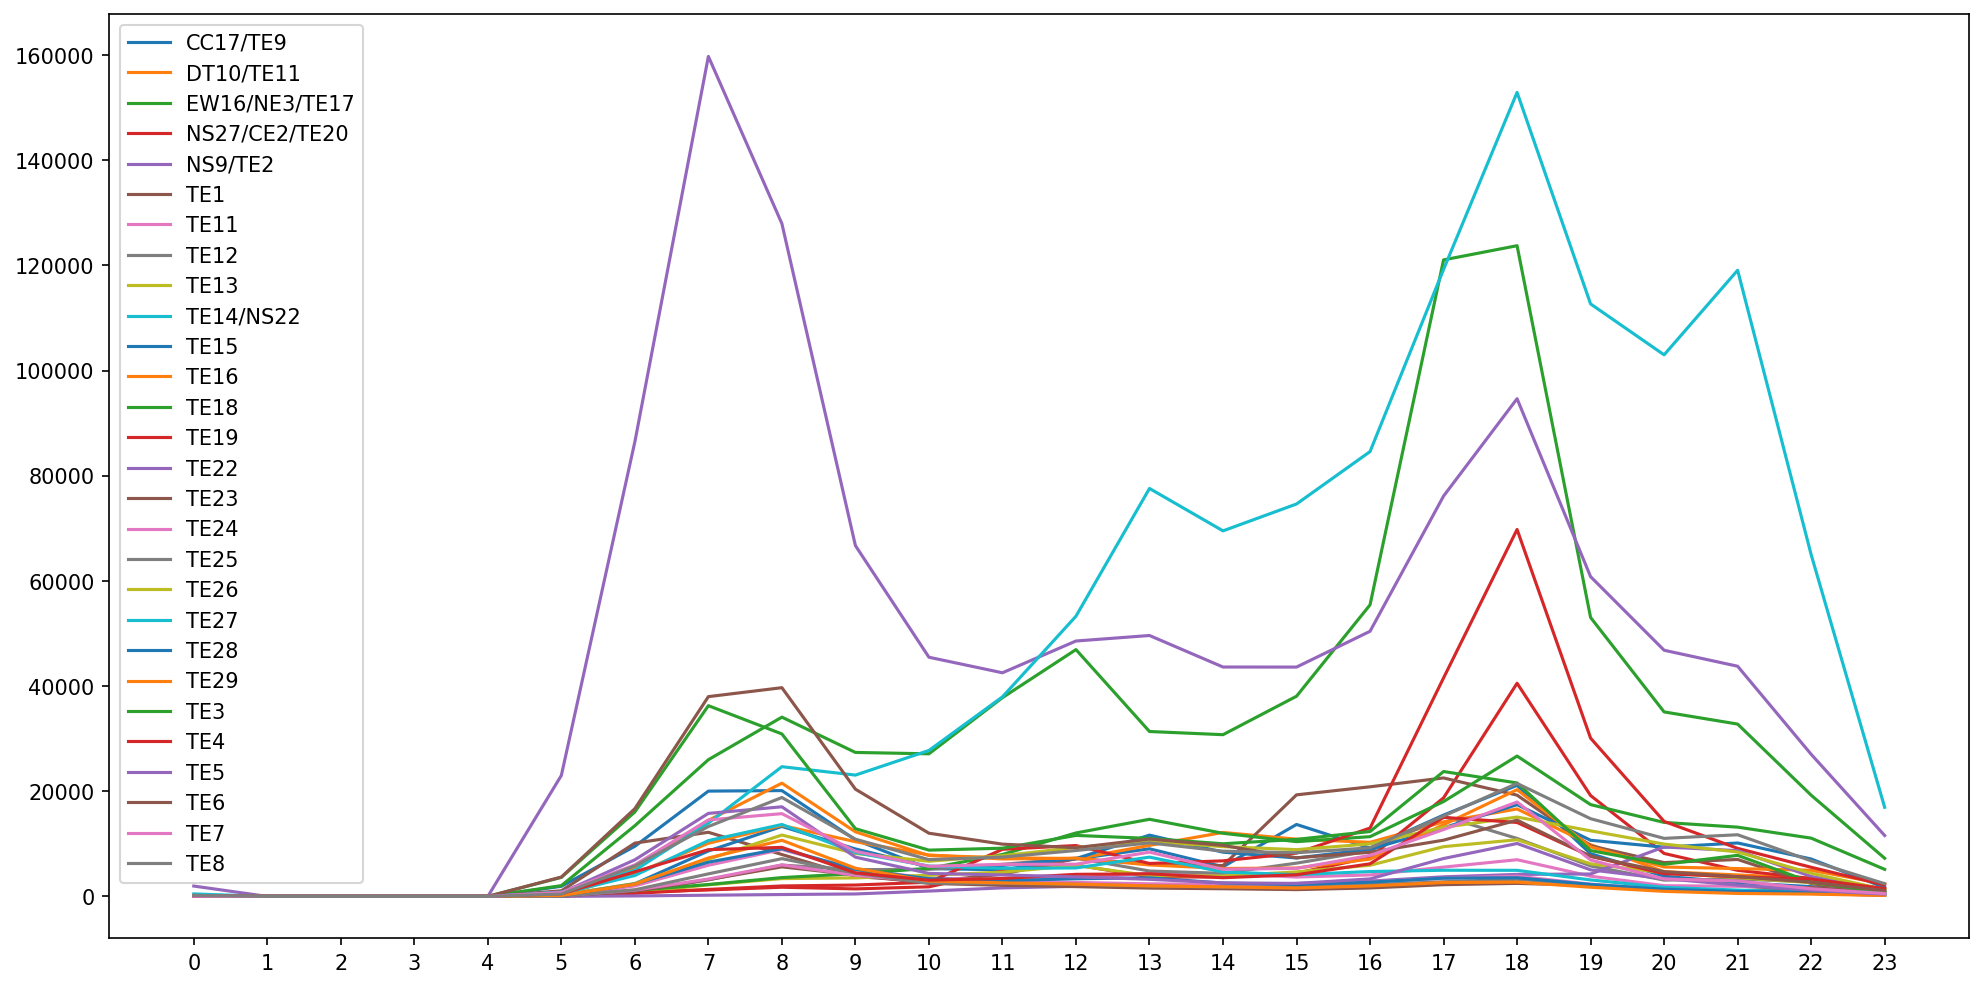

In [82]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKDAY'].copy()
    temp_df = temp_df[temp_df['PT_CODE'] == pt].copy().sort_values(by='TIME_PER_HOUR')
    temp_df = temp_df.groupby('TIME_PER_HOUR')['TOTAL_TAP_IN_VOLUME'].mean()

    plt.plot(temp_df, label = pt)

plt.legend()
plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Peak periods at 7.30am and 6pm (going in and back from work) for weekdays

In [83]:
mrt_thomson_ec_df[(mrt_thomson_ec_df['TIME_PER_HOUR'] >= 7) & (mrt_thomson_ec_df['TIME_PER_HOUR'] <= 7)]

,Unnamed: 0,YEAR_MONTH,DAY_TYPE,TIME_PER_HOUR,PT_TYPE,PT_CODE,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
468,468,2024-03,WEEKENDS/HOLIDAY,7,TRAIN,TE16,1675,1436
469,469,2024-03,WEEKDAY,7,TRAIN,TE16,8539,6678
738,738,2024-03,WEEKDAY,7,TRAIN,TE18,1971,6252
739,739,2024-03,WEEKENDS/HOLIDAY,7,TRAIN,TE18,504,1283
1582,1582,2024-03,WEEKENDS/HOLIDAY,7,TRAIN,TE15,865,1824
...,...,...,...,...,...,...,...,...
61727,6036,2024-11,WEEKENDS/HOLIDAY,7,TRAIN,TE24,569,735
61762,6071,2024-11,WEEKDAY,7,TRAIN,CC17/TE9,18852,17579
61952,6261,2024-11,WEEKENDS/HOLIDAY,7,TRAIN,TE18,659,1614
62015,6324,2024-11,WEEKENDS/HOLIDAY,7,TRAIN,TE29,894,364


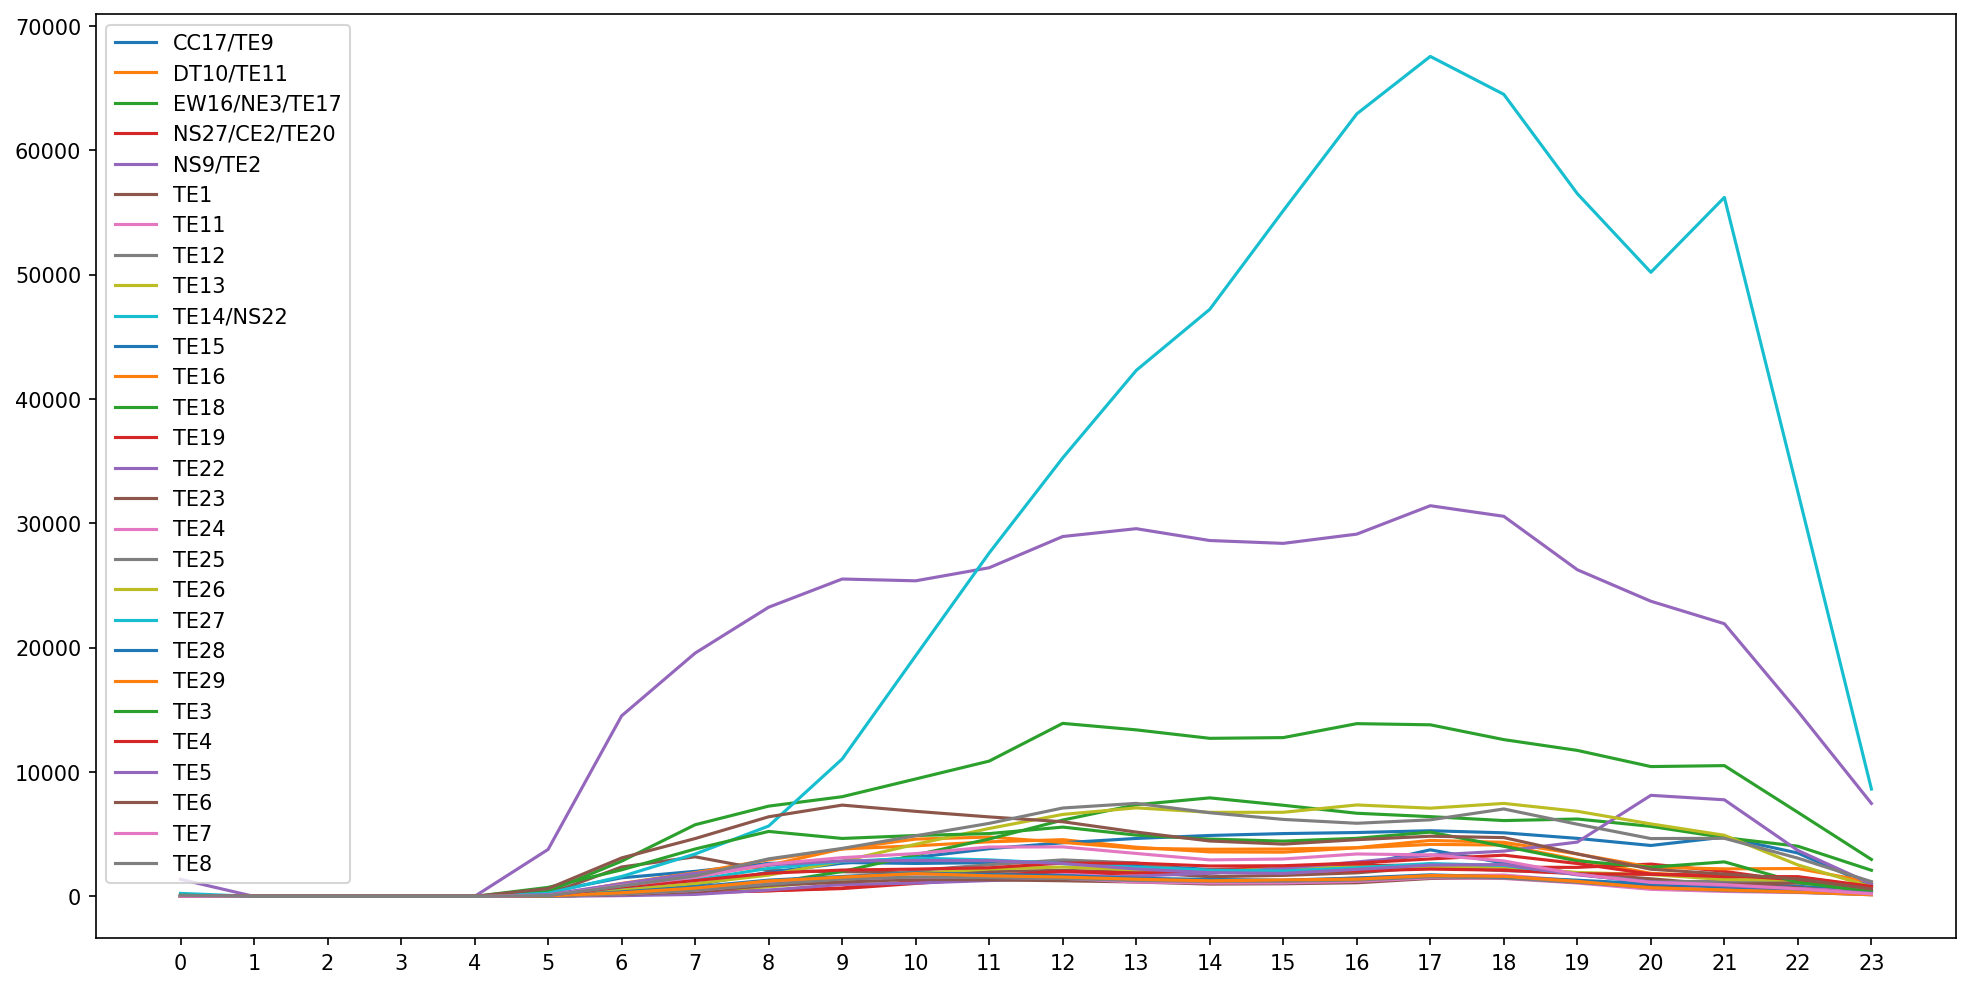

In [84]:
plt.figure(figsize=(16, 8), dpi=150) 

stations = mrt_thomson_ec_df['PT_CODE'].unique()
stations.sort()

for pt in stations:
    temp_df = mrt_thomson_ec_df[mrt_thomson_ec_df['DAY_TYPE'] == 'WEEKENDS/HOLIDAY'].copy()
    temp_df = temp_df[temp_df['PT_CODE'] == pt].copy().sort_values(by='TIME_PER_HOUR')
    temp_df = temp_df.groupby('TIME_PER_HOUR')['TOTAL_TAP_IN_VOLUME'].mean()

    plt.plot(temp_df, label = pt)

plt.legend()
plt.xticks(np.arange(0, 24, 1.0))
plt.show()

# Much less volume overall
# Ramps up in the morning and stays for most of the day
# Peaks around 5pm

In [85]:
mrt_thomson_ec_df_numeric = mrt_thomson_ec_df[['TIME_PER_HOUR', 'TOTAL_TAP_IN_VOLUME', 'TOTAL_TAP_OUT_VOLUME']]

In [86]:
mrt_thomson_ec_df_numeric.corr()

,TIME_PER_HOUR,TOTAL_TAP_IN_VOLUME,TOTAL_TAP_OUT_VOLUME
TIME_PER_HOUR,1.000000,0.216128,0.165514
TOTAL_TAP_IN_VOLUME,0.216128,1.000000,0.715717
TOTAL_TAP_OUT_VOLUME,0.165514,0.715717,1.000000
